<a href="https://colab.research.google.com/github/immelstorun/Angles-detection-with-YOLO/blob/main/M87_angles_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Thu Apr 25 16:08:08 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [13]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [14]:
cd /content/gdrive/MyDrive/angles_detector.v4-1.yolov8

/content/gdrive/MyDrive/angles_detector.v4-1.yolov8


In [15]:
import os
HOME = os.getcwd()
print(HOME)

/content/gdrive/MyDrive/angles_detector.v4-1.yolov8


In [16]:
!pip install ultralytics==8.0.196 -q

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.2/78.2 GB disk)


Now, we can import YOLOv8 into our Notebook:

In [17]:
from ultralytics import YOLO

from IPython.display import display, Image

In [24]:
# !mkdir {HOME}/datasets
# %cd {HOME}/datasets

# !pip install roboflow --quiet

# import roboflow

# roboflow.login()

# rf = roboflow.Roboflow()

# project = rf.workspace("anglesdetector").project("angles_detector")
# dataset = project.version(4).download("yolov8")

## Train a YOLOv8 Keypoint Detection Model


In [19]:
from ultralytics import YOLO

model = YOLO('yolov8s-pose.pt')

results = model.train(data=f"/content/gdrive/MyDrive/angles_detector.v4-1.yolov8/data.yaml", epochs=600, imgsz=640)

New https://pypi.org/project/ultralytics/8.2.2 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=pose, mode=train, model=yolov8s-pose.pt, data=/content/gdrive/MyDrive/angles_detector.v4-1.yolov8/data.yaml, epochs=600, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=Non

## Test the Keypoint Detection Model

Let's test our keypoint detection model on an image:

In [20]:
model = YOLO('/content/gdrive/MyDrive/angles_detector.v4-1.yolov8/runs/pose/train/weights/best.pt')

import os
import random



We can visualize our keypoints using the following code:


image 1/1 /content/gdrive/MyDrive/angles_detector.v4-1.yolov8/test/images/48_jpg.rf.3d869609abd3d776447a9ec95bbd24c0.jpg: 640x640 1 container, 17.6ms
Speed: 3.1ms preprocess, 17.6ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)


ultralytics.engine.results.Keypoints object with attributes:

conf: tensor([[0.9838, 0.9962, 0.9963, 0.9983, 0.9989]], device='cuda:0')
data: tensor([[[344.5808,  62.5307,   0.9838],
         [368.8192, 194.1467,   0.9962],
         [334.6544, 203.9553,   0.9963],
         [363.1070, 159.9560,   0.9983],
         [330.4484, 167.4447,   0.9989]]], device='cuda:0')
has_visible: True
orig_shape: (640, 640)
shape: torch.Size([1, 5, 3])
xy: tensor([[[344.5808,  62.5307],
         [368.8192, 194.1467],
         [334.6544, 203.9553],
         [363.1070, 159.9560],
         [330.4484, 167.4447]]], device='cuda:0')
xyn: tensor([[[0.5384, 0.0977],
         [0.5763, 0.3034],
         [0.5229, 0.3187],
         [0.5674, 0.2499],
         [0.5163, 0.2616]]], device='cuda:0')


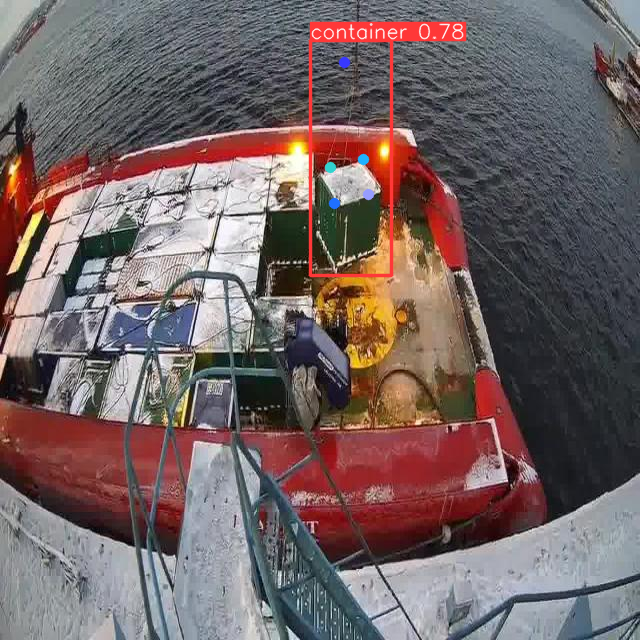

In [23]:
from PIL import Image

random_file = random.choice(os.listdir(f"/content/gdrive/MyDrive/angles_detector.v4-1.yolov8/test/images"))

results = model(os.path.join(f"/content/gdrive/MyDrive/angles_detector.v4-1.yolov8/test/images", random_file))

print(results[0].keypoints)

r = results[0]
im_array = r.plot()  # plot a BGR numpy array of predictions
im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
display(im)

Our model successfully identified keypoints in the image.

## Calculate Keypoint Angle

When you are working with keypoints, you may want to calculate the angle between two keypoints.

In this guide, we want to calculate whether the tip of the keypoint is at a 0 degree (or close to 0, within a set tolerance) angle to the base of the tip. This would indicate the glue stick is upright.

To do so, we can use the following code:

In [ ]:
import math

def check_angle_within_tolerance(xy, tolerance_degrees=5):
    p1, p2 = xy[0]

    dx = p2[0] - p1[0]
    dy = p2[1] - p1[1]

    angle_degrees = math.degrees(math.atan2(abs(dy), abs(dx))) if dx != 0 else 90

    return abs(angle_degrees - 0) <= tolerance_degrees

is_within_tolerance = check_angle_within_tolerance(results[0].keypoints.xy)
is_within_tolerance

# Deploy Your Model to the Edge

In addition to using the Roboflow hosted API for deployment, you can use [Roboflow Inference](https://inference.roboflow.com), an open source inference solution that has powered millions of API calls in production environments. Inference works with CPU and GPU, giving you immediate access to a range of devices, from the NVIDIA Jetson to TRT-compatible devices to ARM CPU devices.

With Roboflow Inference, you can self-host and deploy your model on-device.

To run inference on device, first install Inference:

```bash
pip install inference inference-sdk
```

Then, create a client through which to run your model:

```python
from inference_sdk import InferenceHTTPClient, InferenceConfiguration

project_id = ""
model_version = 1
confidence = 0.75

custom_configuration = InferenceConfiguration(confidence_threshold=confidence)

client = InferenceHTTPClient(
    api_url="http://localhost:9001",
    api_key=os.environ["API_KEY"],
)

client.select_api(model_version)
```


Above, set your Roboflow workspace ID, model ID, and API key.

- [Find your workspace and model ID](https://docs.roboflow.com/api-reference/workspace-and-project-ids?ref=blog.roboflow.com)
- [Find your API key](https://docs.roboflow.com/api-reference/authentication?ref=blog.roboflow.com#retrieve-an-api-key)

Then, you can run inference on a file:

```python
results = client.infer(image_url, model_id=f"{project_id}/{model_version}")

print(predictions)
```

_To use your YOLOv8 model commercially with Inference, you will need a Roboflow Enterprise license, through which you gain a pass-through license for using YOLOv8. An enterprise license also grants you access to features like advanced device management, multi-model containers, auto-batch inference, and more._

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.